In [1]:
### This is the Google Colab notebook the neural network was developed in

# Install nltk
%pip install --user  -U nltk

Note: you may need to restart the kernel to use updated packages.


ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import all libraries
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import pickle
import re
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import warnings

warnings.filterwarnings('ignore')
np.set_printoptions(precision=4)

nltk.download('stopwords')
nltk.download('punkt')

C:\Users\PC\AppData\Local\Temp\ipykernel_6856\2403509429.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Load dataset
data = pd.read_csv('../data/UpdatedResumeDataSet.csv', engine='python')
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
# Print unique categories of resumes
print(data['Category'].value_counts())

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


In [5]:
# Drop rows where category is "Testing" and store new size of dataset
data = data[data.Category != 'Testing']
data_size = len(data)

<Axes: xlabel='count', ylabel='Category'>

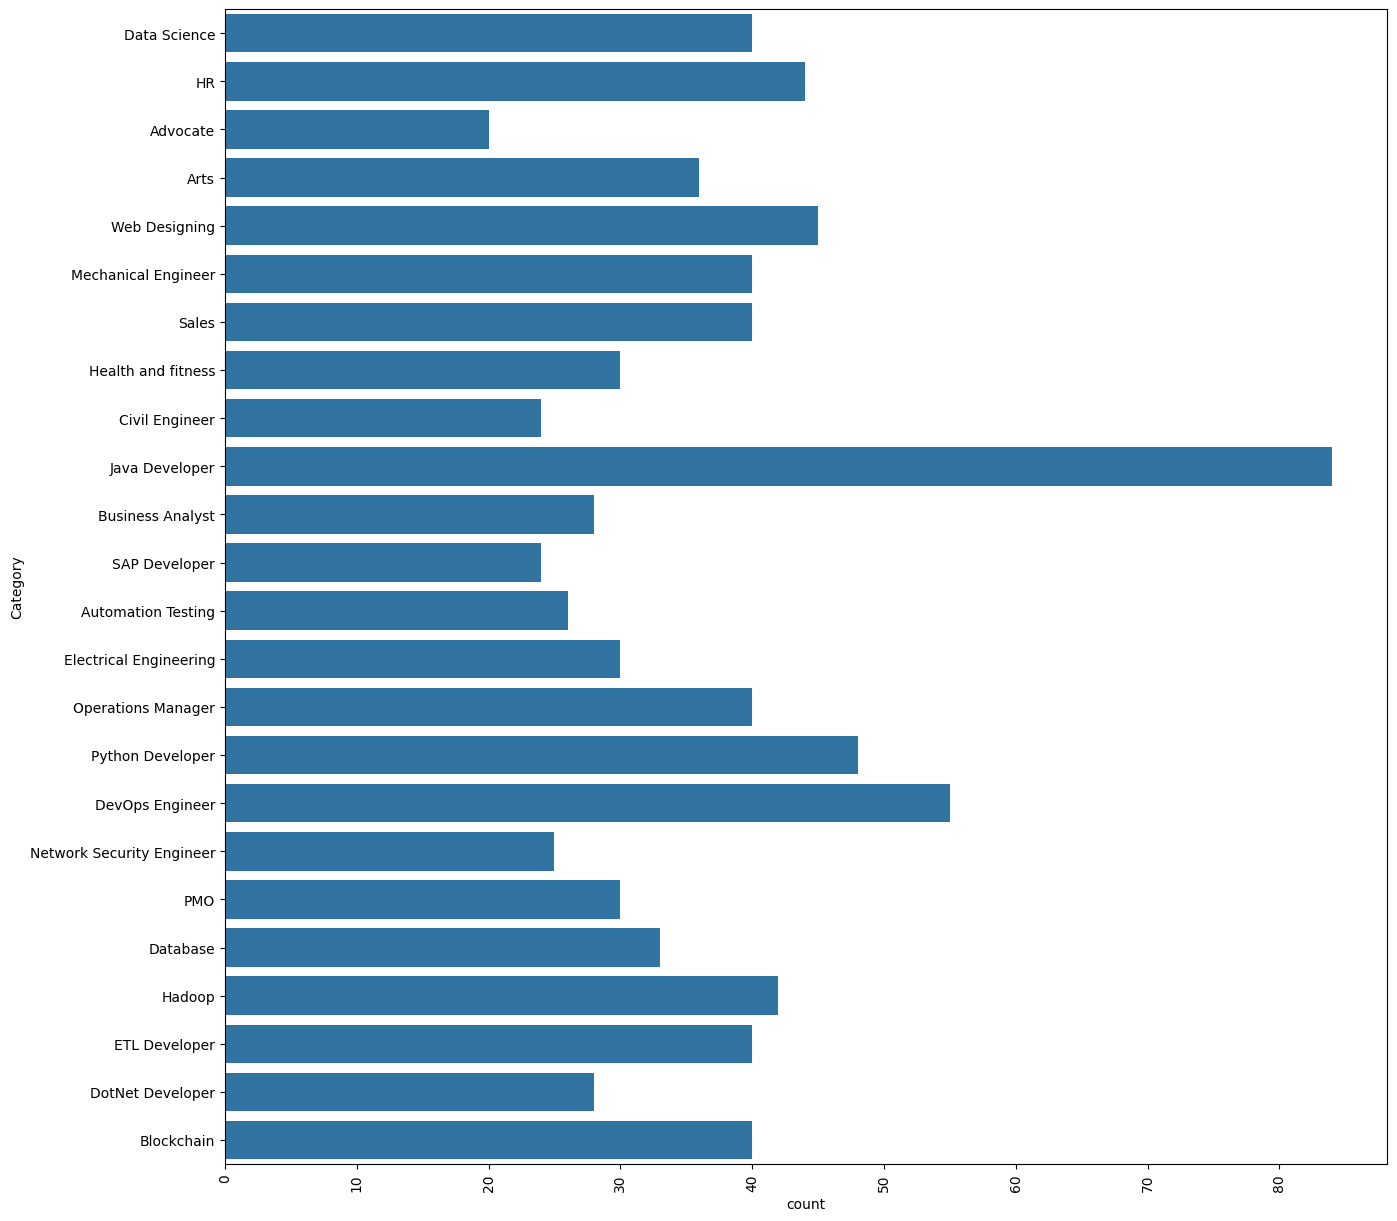

In [6]:
# Bar graph visualization
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=data)

In [7]:
# Get set of stopwords
stopwords_set = set(stopwords.words('english')+['``',"''"])

In [8]:
# Function to clean resume text
def clean_text(resume_text):
    resume_text = re.sub('http\S+\s*', ' ', resume_text)  # remove URLs
    resume_text = re.sub('RT|cc', ' ', resume_text)  # remove RT and cc
    resume_text = re.sub('#\S+', '', resume_text)  # remove hashtags
    resume_text = re.sub('@\S+', '  ', resume_text)  # remove mentions
    resume_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resume_text)  # remove punctuations
    resume_text = re.sub(r'[^\x00-\x7f]',r' ', resume_text) 
    resume_text = re.sub('\s+', ' ', resume_text)  # remove extra whitespace
    resume_text = resume_text.lower()  # convert to lowercase
    resume_text_tokens = word_tokenize(resume_text)  # tokenize
    filtered_text = [w for w in resume_text_tokens if not w in stopwords_set]  # remove stopwords
    return ' '.join(filtered_text)

In [9]:
# Print a sample original resume
print('--- Original resume ---')
print(data['Resume'][0])

--- Original resume ---
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and 

In [10]:
# Print the same resume after text cleaning
data['cleaned_resume'] = data.Resume.apply(lambda x: clean_text(x))

print('--- Cleaned resume ---')
print(data['cleaned_resume'][0])

--- Cleaned resume ---
skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv understanding deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists elerating r

In [11]:
# Get features and labels from data and shuffle
features = data['cleaned_resume'].values
original_labels = data['Category'].values
labels = original_labels[:]

for i in range(data_size):
  labels[i] = str(labels[i].lower())  # convert to lowercase
  labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens

features, labels = shuffle(features, labels)

# Print example feature and label
print(features[0])
print(labels[0])

technical strengths computer language java j2ee swift html shell script mysql databases mysql tools svn jenkins hudson weblogic12c software android studio eclipse oracle xcode operating systems win 10 mac high sierra education details june 2016 b e information technology goregaon maharashtra vidyalankar institute technology may 2013 mumbai maharashtra thakur polytechnic may 2010 mumbai maharashtra st john universal school java developer java developer tech mahindra skill details java exprience 21 months mysql exprience 21 months databases exprience 17 months j2ee exprience 17 months android exprience 6 monthscompany details company tech mahindra description team size 5 environment java mysql shell script webserver jenkins description formatter application takes input file geneva modified file gmf geneva server reads data generate bill backup bill invoices client customers bt invoices would sent across clients billing contribution played role java developer involved applying change requ

In [12]:
# Split for train and test
train_split = 0.8
train_size = int(train_split * data_size)

train_features = features[:train_size]
train_labels = labels[:train_size]

test_features = features[train_size:]
test_labels = labels[train_size:]

# Print size of each split
print(len(train_labels))
print(len(test_labels))

713
179


In [13]:
# Tokenize feature data and print word dictionary
vocab_size = 6000
oov_tok = '<OOV>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())))

# Print example sequences from train and test datasets
train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)
print(train_feature_sequences[0])

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)
print(test_feature_sequences[0])

{'<OOV>': 1, 'exprience': 2, 'company': 3, 'project': 4, 'months': 5, 'description': 6, 'details': 7, 'data': 8, '1': 9, 'management': 10, 'team': 11, 'year': 12, '6': 13, 'system': 14, 'maharashtra': 15, 'database': 16, 'development': 17, 'business': 18, 'less': 19, 'sql': 20, 'ltd': 21, 'using': 22, 'developer': 23, 'client': 24, 'java': 25, 'skill': 26, 'testing': 27, 'application': 28, 'pune': 29, 'engineering': 30, 'january': 31, 'services': 32, 'work': 33, 'skills': 34, 'c': 35, 'test': 36, 'software': 37, 'sales': 38, 'responsibilities': 39, 'pvt': 40, 'operations': 41, 'requirements': 42, 'reports': 43, 'education': 44, 'server': 45, 'technical': 46, 'process': 47, 'india': 48, 'customer': 49, 'various': 50, 'design': 51, 'technologies': 52, 'university': 53, 'working': 54, 'python': 55, 'monthscompany': 56, '2': 57, 'environment': 58, 'web': 59, 'like': 60, 'college': 61, 'automation': 62, 'support': 63, 'mysql': 64, 'worked': 65, 'role': 66, 'technology': 67, 'activities': 68

In [14]:
# Tokenize label data and print label dictionary
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))

# Print example label encodings from train and test datasets
train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)
print(train_label_sequences[0])

test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)
print(test_label_sequences[0])

{'javadeveloper': 1, 'devopsengineer': 2, 'pythondeveloper': 3, 'webdesigning': 4, 'hr': 5, 'hadoop': 6, 'operationsmanager': 7, 'etldeveloper': 8, 'datascience': 9, 'sales': 10, 'blockchain': 11, 'mechanicalengineer': 12, 'arts': 13, 'database': 14, 'electricalengineering': 15, 'healthandfitness': 16, 'pmo': 17, 'businessanalyst': 18, 'dotnetdeveloper': 19, 'automationtesting': 20, 'networksecurityengineer': 21, 'civilengineer': 22, 'sapdeveloper': 23, 'advocate': 24}
[1]
[24]


In [15]:
# Pad sequences for feature data
max_length = 300
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

# Print example padded sequences from train and test datasets
print(train_feature_padded[0])
print(test_feature_padded[0])

[  46 1034   86  479   25  523 3489  122  135  268   64  217   64  108
 1410  469 4892 3168   37 1043  309  628   93 4893  163   90 1336  190
 1337  164 4894   44    7  204  137   92   70   81   67 4895   15 4896
  237   67  250  343   78   15 2988  742  250  294   78   15 1113 4897
 3490  139   25   23   25   23  300  743   26    7   25    2 1227    5
   64    2 1227    5  217    2 1044    5  523    2 1044    5 1043    2
   13   56    7    3  300  743    6   11  281  119   58   25   64  135
  268 3169  469    6 4898   28 2237 1895  452 3170 1608  452 4899 3170
   45 4900    8  365 1698  256 1698  983   24  123 3491  983 1609  674
  269  138  211  837 1159   66   25   23  104  795  283  592 1135  363
   65   94  109   17  103 1610  146 3171  667  221   27  103 1610  384
 3113   76  876  414  447  128  248  155  103  155  144    3  300  743
    6   11  281  119   58   25 4157   64  135  268 3169 3168   45  469
    6 3172 4901 1858  465 4855  510   24  340   63   90 1996   90 2989
 1996 

In [16]:
# Define the neural network
embedding_dim = 64

model = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  #tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(25, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 64)             384000    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 25)                1625      
                                                                 
Total params: 459929 (1.75 MB)
Trainable params: 459929 (1.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# # Alternative model
# embedding_dim = 64

# model = tf.keras.Sequential([
#   # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
#   tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=1),
#   #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#   #tf.keras.layers.Flatten(),
#   #tf.keras.layers.GlobalAveragePooling1D(),
#   tf.keras.layers.GlobalMaxPooling1D(),


#   # use ReLU in place of tanh function since they are very good alternatives of each other.
#   tf.keras.layers.Dense(128, activation='relu'),
#   # Add a Dense layer with 25 units and softmax activation for probability distribution
#   tf.keras.layers.Dense(25, activation='softmax'),
#   #tf.keras.layers.Dense(1, activation='sigmoid'),
#   #tf.keras.layers.Dense(1)

# ])

# model.summary()

In [18]:
# Compile the model and convert train/test data into NumPy arrays
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Features
train_feature_padded = np.array(train_feature_padded)
test_feature_padded = np.array(test_feature_padded)

# Labels
train_label_sequences = np.array(train_label_sequences)
test_label_sequences = np.array(test_label_sequences)

# Print example values
#print(train_feature_padded[0])
#print(train_label_sequences[0])
#print(test_feature_padded[0])
#print(test_label_sequences[0])

In [19]:
# Train the neural network
num_epochs = 12

history = model.fit(train_feature_padded, train_label_sequences, epochs=num_epochs, validation_data=(test_feature_padded, test_label_sequences), verbose=2)

Epoch 1/12


23/23 - 10s - loss: 3.1817 - accuracy: 0.1613 - val_loss: 3.1113 - val_accuracy: 0.1117 - 10s/epoch - 415ms/step
Epoch 2/12
23/23 - 6s - loss: 2.8677 - accuracy: 0.1641 - val_loss: 2.7804 - val_accuracy: 0.0894 - 6s/epoch - 242ms/step
Epoch 3/12
23/23 - 4s - loss: 2.3616 - accuracy: 0.2749 - val_loss: 2.1221 - val_accuracy: 0.4246 - 4s/epoch - 182ms/step
Epoch 4/12
23/23 - 4s - loss: 1.8566 - accuracy: 0.4334 - val_loss: 1.7131 - val_accuracy: 0.5419 - 4s/epoch - 161ms/step
Epoch 5/12
23/23 - 3s - loss: 1.3758 - accuracy: 0.5961 - val_loss: 1.1188 - val_accuracy: 0.8380 - 3s/epoch - 149ms/step
Epoch 6/12
23/23 - 4s - loss: 0.8655 - accuracy: 0.8022 - val_loss: 0.7261 - val_accuracy: 0.8603 - 4s/epoch - 156ms/step
Epoch 7/12
23/23 - 4s - loss: 0.5424 - accuracy: 0.8822 - val_loss: 0.4597 - val_accuracy: 0.9274 - 4s/epoch - 192ms/step
Epoch 8/12
23/23 - 4s - loss: 0.5224 - accuracy: 0.8836 - val_loss: 0.4917 - val_accuracy: 0.9218 - 4s/epoch - 176ms/step
Epoch 9/12
23/23 - 4

In [20]:
# print example feature and its correct label
print(test_features[5])
print(test_labels[5])

computer knowledge proficient basic use ms office microsoft dynamics ax software saiba softwareeducation details mba distance education bharathiar university pa college engineering technology hsc r v g hr sec school ssc g hr sec school hr admin bharat skill details dynamics exprience 6 months dynamics ax exprience 6 months microsoft dynamics exprience 6 months microsoft dynamics ax exprience 6 months ms office exprience 6 monthscompany details company sri ramesh gaarment description tirupur administration well clients service corporate companies insured knowledge gathered garments spinning mills feb 2018 still sri ramesh gaarment tirupur hr activities attendance maintenance time cards maintenance staffs labors individual records maintenance project advanced automobile collision avoidance blackbox car
hr


In [21]:
# Create padded sequence for example
resume_example = 'skills bitcoin ethereum solidity hyperledger beginner go beginner r3 corda beginner tendermint nodejs c programming java machine learning specilaized brain computer interface computer networking server admin computer vision data analytics cloud computing reactjs angulareducation details january 2014 january 2018 bachelor engineering computer science engineering thakur college engineering technology september 2016 march 2017 dynamic blood bank system mumbai maharashtra iit january 2014 cbse senior secondary january 2011 cbse banking vidyashram public school blockchain developer blockchain developer zhypility technologies skill details networking exprience 27 months data analytics exprience 11 months computer vision exprience 6 months java exprience 6 months machine learning exprience 6 monthscompany details company zhypility technologies description une 2018 company area business owner amway enterprise limited description business strategizing promotion analytics networking terms company virtual description developing prototype smart india hackthon deployment level 3 networking switch intern bharti airtel private limited mumbai company 1 international research scholar university rome tor vergata rome description nov 2017 nov 2017 done research reality based brain computer interface proposed paper international journal advanced research ijar 20656 epted paper reviewer smart kisan revolutionizing country ijsrd epted publication company description reliance jio mumbai dec 2017 jan 2017 company maharastra state government hackthon description company virtual description handling group interns marketing sales team nearby promote social media platform nearby products company promotion stock marketing drums foods international description company 8 data science web analytics positron internet virtual description company description making people aware women equality rights raise voice violence various modes events sources media help society company iit bombay iit kgp startup description company iit bombay iit kgp startup description'
example_sequence = feature_tokenizer.texts_to_sequences([resume_example])
example_padded = pad_sequences(example_sequence, maxlen=max_length, padding=pad_type, truncating=trunc_type)
example_padded = np.array(example_padded)
print(example_padded)

[[  34 1385  485 1386 2076 2077  781 2077 2013 4513 2077 4514 2871   35
   214   25  165  159 4515 2192   86  510   86  514   45  528   86 1226
     8  273  263 1655 4516 4517    7   31  220   31  258  246   30   86
   101   30 2988   61   30   67 1223  137  960  132 1168 4518  181   14
    78   15 1130   31  220 2078  227  458   31  432 2078  330 4519  689
   139  259   23  259   23 2872   52   26    7  514    2  963    5    8
   273    2  695    5   86 1226    2   13    5   25    2   13    5  165
   159    2   13   56    7    3 2872   52    6 4520  258    3  505   18
  3262 4521  415  206    6   18 2811 1582  273  514 1066    3 1287    6
   113 1430  534   48 2873  255  155   80  514 1864 3348 4522 2971  376
   206   78    3    9  203  400 4523   53 2874 4524 4525 2874    6  785
   132  785  132  430  400 3849   72 2192   86  510 2026  811  203 4526
  1149  400 4527 4528 1951  811 4529  534 2328 4530 2322 4531 1951 2151
     3    6 1661 2875   78 1406  132  683  132    3 4532  215  7

In [22]:
# Make a prediction
prediction = model.predict(example_padded)

1/1 [==============================] - 1s 972ms/step


In [23]:
# Verify that prediction has correct format
print(prediction[0])
print(len(prediction[0]))  # should be 25
print(np.sum(prediction[0]))  # should be 1

[2.6261e-09 1.2291e-03 3.4874e-03 2.0119e-05 1.2984e-03 5.9412e-09
 4.5123e-04 1.3590e-07 7.7016e-07 8.7365e-09 1.9460e-06 9.8269e-01
 1.2463e-05 2.0809e-05 2.0588e-05 1.3370e-04 1.1892e-05 6.5357e-03
 8.7885e-07 3.9924e-03 2.0466e-05 6.8598e-05 6.9137e-09 2.9564e-06
 2.3295e-07]
25
0.99999994


In [24]:
# Find maximum value in prediction and its index
print(max(prediction[0]))  # confidence in prediction (as a fraction of 1)
print(np.argmax(prediction[0])) # should be 11 which corresponds to blockchain

0.98269
11


In [25]:
# Indices of top 5 most probable solutions
indices = np.argpartition(prediction[0], -5)[-5:]
indices = indices[np.argsort(prediction[0][indices])]
indices = list(reversed(indices))
print(indices)

[11, 17, 19, 2, 4]


In [26]:
# Save model
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [27]:
# Save feature tokenizer
with open('feature_tokenizer.pickle', 'wb') as handle:
    pickle.dump(feature_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [28]:
# Save reverse dictionary of labels to encodings
label_to_encoding = dict(list(label_index.items()))
print(label_to_encoding)

encoding_to_label = {}
for k, v in label_to_encoding.items():
  encoding_to_label[v] = k
print(encoding_to_label)

with open('dictionary.pickle', 'wb') as handle:
    pickle.dump(encoding_to_label, handle, protocol=pickle.HIGHEST_PROTOCOL)

{'javadeveloper': 1, 'devopsengineer': 2, 'pythondeveloper': 3, 'webdesigning': 4, 'hr': 5, 'hadoop': 6, 'operationsmanager': 7, 'etldeveloper': 8, 'datascience': 9, 'sales': 10, 'blockchain': 11, 'mechanicalengineer': 12, 'arts': 13, 'database': 14, 'electricalengineering': 15, 'healthandfitness': 16, 'pmo': 17, 'businessanalyst': 18, 'dotnetdeveloper': 19, 'automationtesting': 20, 'networksecurityengineer': 21, 'civilengineer': 22, 'sapdeveloper': 23, 'advocate': 24}
{1: 'javadeveloper', 2: 'devopsengineer', 3: 'pythondeveloper', 4: 'webdesigning', 5: 'hr', 6: 'hadoop', 7: 'operationsmanager', 8: 'etldeveloper', 9: 'datascience', 10: 'sales', 11: 'blockchain', 12: 'mechanicalengineer', 13: 'arts', 14: 'database', 15: 'electricalengineering', 16: 'healthandfitness', 17: 'pmo', 18: 'businessanalyst', 19: 'dotnetdeveloper', 20: 'automationtesting', 21: 'networksecurityengineer', 22: 'civilengineer', 23: 'sapdeveloper', 24: 'advocate'}


In [29]:
print(encoding_to_label[np.argmax(prediction[0])])

blockchain
